In [0]:
#pip install tensorflow==1.14

In [2]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.log_device_placement = True
sess = tf.Session(config=config)
set_session(sess)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [0]:
from keras.preprocessing.text import Tokenizer
from gensim.models.fasttext import FastText
import numpy as np
import matplotlib.pyplot as plt
import nltk
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk import WordPunctTokenizer
from nltk.corpus import gutenberg
%matplotlib inline

# Load data

In [5]:
nltk.download('gutenberg')
gutenberg.fileids()

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [6]:
#bible = gutenberg.sents('bible-kjv.txt')
bible = gutenberg.raw('bible-kjv.txt')
bible

Output hidden; open in https://colab.research.google.com to view.

In [22]:
import nltk
#nltk.download('punkt')
#nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [23]:
bible_sents = sent_tokenize(bible)
bible_sents

print('Total lines:', len(bible_sents))

Total lines: 29812


# Cleaning Text

In [0]:
remove_terms = punctuation + '0123456789'

In [0]:
def preprocessing(text):
    words = word_tokenize(text)
    tokens = [w for w in words if w.lower() not in remove_terms]
    stopw = stopwords.words('english')
    tokens = [token for token in tokens if token not in stopw]
    # remove words less than three letters
    tokens = [word for word in tokens if len(word)>=3]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # lemmatize
    lemma = WordNetLemmatizer()
    tokens = [lemma.lemmatize(word) for word in tokens]    
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

In [42]:
corpus = [preprocessing(sentence) for sentence in bible_sents if sentence.strip() !='']
corpus[0:5]

['The King James Bible The Old Testament King James Bible The First Book Moses Called Genesis beginning God created heaven earth',
 'And earth without form void darkness upon face deep',
 'And Spirit God moved upon face water',
 'And God said Let light light',
 'And God saw light good God divided light darkness']

In [27]:
wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(doc) for doc in corpus]
tokenized_corpus[1]

['And', 'earth', 'without', 'form', 'void', 'darkness', 'upon', 'face', 'deep']

# Train Model

In [0]:
feature_size = 50   # Word embedding vector dimensionality  
window_context = 30  # Context window size                                                                                    
min_word_count = 5   # Minimum word count                        
sample = 1e-3   # Downsample setting for frequent words

In [0]:
fasttext_model = FastText(tokenized_corpus,
                          size=feature_size,
                          window=window_context,
                          min_count=min_word_count,
                          sample=sample,
                          sg=1, # sg decides whether to use the skip-gram model (1) or CBOW (0)
                          iter=50)

#Semantic Similarities

In [30]:
print(fasttext_model.wv['god'])

[ 0.40143993 -0.1214206   0.7191825  -0.3273754   0.01489765 -0.2892423
 -0.20977639 -0.08517592 -0.5194945   0.29274604  0.6125549  -0.12263562
 -0.05400937 -0.55799353 -0.06318749 -0.0176579   0.03949119  0.3016397
 -0.15706708  0.6801016   0.07761441 -0.0362188  -0.22239505  0.21459281
 -0.1142725  -0.4956428   0.10835022 -0.03717181 -0.10933921 -0.02405236
  0.3012843  -0.46535587  0.11108736  0.00371037  0.15317307 -0.26897997
 -0.4043718   0.04929293  0.24664855  0.0320578   0.3027075  -0.434231
 -0.43785402 -0.02172026 -0.5130467   0.08294213  0.32071495  0.18429126
  0.09755982  0.51155967]


In [31]:
similar_words = {search_term: [item[0] for item in fasttext_model.wv.most_similar([search_term], topn=5)]
                  for search_term in ['god', 'jesus', 'noah', 'egypt', 'john', 'gospel', 'moses']}
similar_words  

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


{'egypt': ['Egypt', 'Pharaoh', 'land', 'Egyptians', 'bondage'],
 'god': ['Baalim', 'serve', 'served', 'goddess', 'graven'],
 'gospel': ['faith', 'preach', 'Christ', 'preached', 'grace'],
 'jesus': ['Ephesus', 'Jesus', 'Paul', 'Christ', 'truth'],
 'john': ['John', 'Jesus', 'Paul', 'Baptist', 'Peter'],
 'moses': ['Joses', 'costly', 'linen', 'Timnath', 'threshingfloor'],
 'noah': ['Manoah', 'Zanoah', 'Maon', 'Etam', 'Adullam']}

In [32]:
print(fasttext_model.wv.similarity(w1='god', w2='satan'))

0.38273498


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


#Saving model

In [34]:
fasttext_model.save('saved_fasttext_model_gensim')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [36]:
loaded_model = FastText.load('saved_fasttext_model_gensim')
print(loaded_model)

FastText(vocab=5002, size=50, alpha=0.025)


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


# Visualizing words

In [0]:
from sklearn.decomposition import PCA
words = sum([[k] + v for k, v in similar_words.items()], [])

In [0]:
wvs = fasttext_model.wv[words]

In [0]:
pca = PCA(n_components=2)

In [0]:
P = pca.fit_transform(wvs)
labels = words

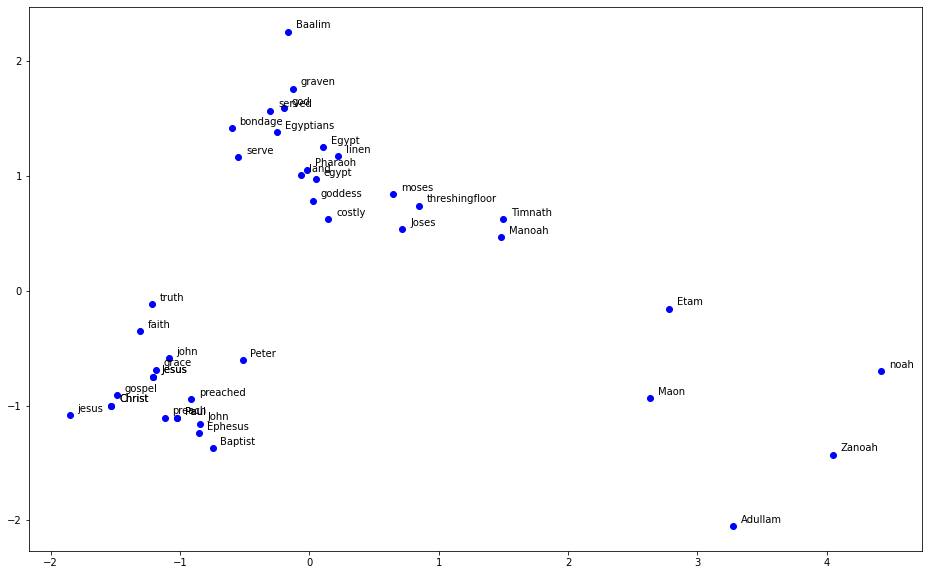

In [41]:
plt.figure(figsize=(16, 10))
plt.scatter(P[:, 0], P[:, 1], c='blue')
for label, x, y in zip(labels, P[:, 0], P[:, 1]):
    plt.annotate(label, xy=(x+0.06, y+0.03), xytext=(0, 0), textcoords='offset points')